In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from copy import deepcopy
from tqdm import tqdm

from ex_simulation import p
from dset import get_dataloader, load_pretrained_model

# adaptive-wavelets modules
from losses import get_loss_f
from train import Trainer
from evaluate import Validator
from transform1d import DWT1d
from utils import get_1dfilts, get_wavefun
from wave_attributions import Attributer
from visualize import cshow, plot_1dfilts, plot_1dreconstruct, plot_wavefun

# define wavelet

In [2]:
def wavefun(wt, t, level=10):
    phi, psi, x = get_wavefun(wt, level=level)
    x = x/np.ceil(x[-1]) # range between 0 and 1
    
    phi_new, psi_new = np.zeros_like(t), np.zeros_like(t)
    idx = np.argwhere((t >= 0) & (t <= 1)).flatten()
    dist = abs(t[idx][:,None] - x[None])
    x_idx = np.argmin(dist, axis=1)
    phi_new[idx] = phi[x_idx]
    psi_new[idx] = psi[x_idx]    
    return phi_new, psi_new

In [3]:
# wavelet transform 
wt = DWT1d(wave='db5', mode='zero', J=p.J, init_factor=1, noise_factor=0, const_factor=0).to(device)

In [4]:
t = np.arange(0, 1, 0.001)
phi0, psi0 = wavefun(wt, t)
phi10, psi10 = wavefun(wt, 2*t)
phi11, psi11 = wavefun(wt, 2*t-1)
phi20, psi20 = wavefun(wt, 4*t)
phi21, psi21 = wavefun(wt, 4*t-1)
phi22, psi22 = wavefun(wt, 4*t-2)
phi23, psi23 = wavefun(wt, 4*t-3)

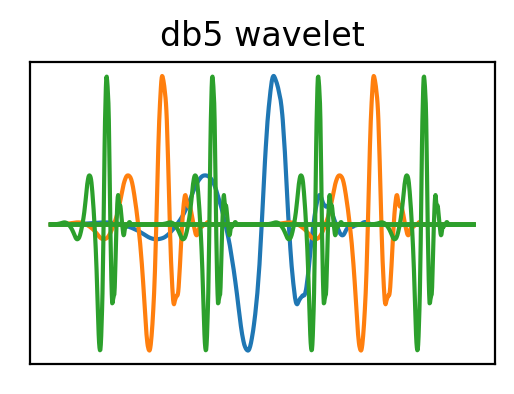

In [7]:
plt.figure(figsize=(3,2), dpi=200)
plt.plot(t, psi0, color='C0')
plt.plot(t, psi10, color='C1')
plt.plot(t, psi11, color='C1')
plt.plot(t, psi20, color='C2')
plt.plot(t, psi21, color='C2')
plt.plot(t, psi22, color='C2')
plt.plot(t, psi23, color='C2')
plt.xticks([])
plt.yticks([])
plt.title('db5 wavelet')
plt.show()

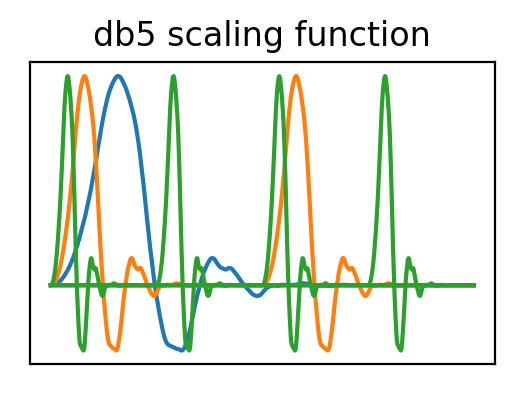

In [8]:
plt.figure(figsize=(3,2), dpi=200)
plt.plot(t, phi0, color='C0')
plt.plot(t, phi10, color='C1')
plt.plot(t, phi11, color='C1')
plt.plot(t, phi20, color='C2')
plt.plot(t, phi21, color='C2')
plt.plot(t, phi22, color='C2')
plt.plot(t, phi23, color='C2')
plt.xticks([])
plt.yticks([])
plt.title('db5 scaling function')
plt.show()